In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import gym
import numpy as np
import random as pr
from gym.envs.registration import register
import tensorflow as tf
# tf.enable_eager_execution()

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
#강화 학습 환경을 설정
register(
    id="FrozenLake-v1",  #강화 학습 환경의 아이디를 설정
    #gym.envs.toy_text:FrozenLakeEnv : FrozenLake 환경을 설정해서 리턴 하도록 설정
    entry_point="gym.envs.toy_text:FrozenLakeEnv", 
    kwargs={
            "map_name": "4x4",  #FrozenLake 의 줄 칸을 설정 4줄 X4 칸
            "is_slippery":False #미끄러짐 효과 설정 안함
            }
)

In [0]:
#gym.make("FrozenLake-v1"): FrozenLake-v1 환경을 설정해서 env에 리턴
env=gym.make("FrozenLake-v1")

In [5]:
# 입력값을 읽어서 예측을 할 Sequential 객체 생성
model = Sequential()
# model에 데이터 분석 객체를 추가

# Dense(16, input_dim=4, activation="sigmoid")
# Dense : 선형 회귀를 수행할 객체
# Dense(출력데이터의 칸의 수) : 출력 데이터는 hypothesis0 이고 칸의 수는 4이므로
# Dense(4)

# input_dim : 입력 데이터 칸의 수, 입력 데이터는 X이고 칸의 수는 16이므로 16

# Dense(4, input_dim=16) : 선형 회귀를 할 객체를 생성
                            #: 출력 칸 수는 4 입력 칸 수 16

# activation="linear" : 선형 회귀 후 입력값과 w를 곱한 수를 리턴


# Dense 모델을 예측 할 수 있도록 model에 추가
# model.add(Dense(4, input_dim=16, activation="linear"))

model.add(Dense(4, input_dim=16, activation="linear"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 68        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [0]:
# GradientDecent를 이용해서 w를 찾는 방법을 설정함
# loss='mse' : tf.reduce_sum(tf.square(Qs-predQ)) : Qs(실제 Q)와
# PredQ(예측한 Q)의 차의 제곱이 최소가 되는 w를 찾음

# w 값을 자동으로 수정하는 AdamOptimizer 객체를 생성
# Optimizer=Adam(lr=0.1) : learning rate를 0.001로 설정
model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mse'])

In [0]:
dis=0.99
# 성공여부를 저장 할 리스트
successList=[]

In [0]:
# optimizer=tf.train.AdamOptimizer(0.001)

In [0]:
# np.identity(16)[2:3]

In [0]:
def one_hot(num):
    # np.identity(16)[num] : num을 onehot 인코딩 해서 리턴
    # 배열 사이즈는 16
    arr=np.identity(16)[num:num+1]
    # np.array(onehot_arr, dtype="float32") : one hot을 float32 타입 배열로 변환해서 리턴
    return np.array(arr, dtype="float32")

In [11]:
one_hot(5)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [12]:
# 2000번 반복해서 실행

for step in range(2000):
    print("="*100)
    print("step:",step)
    # 게임 재시작
    position=env.reset()

    # step//100 + 1로 1을 나눠줌
    # step이 커질수록 e가 작아짐
    # e가 커지면 action을 랜덤하게 선택할 확률이 높아지는데 처음에는 랜덤하게 선택하다가
    # 랜덤하게 선택하는 것은 줄이고 Q테이블의 최대값을 선택
    e=1.0/((step//100)+1)

    while True:
        # with tf.GradientTape() as tape:
            position_onehot=one_hot(position)
            print("position:",position)
            print("position_onehot:",position_onehot)

            # position에 w를 곱해서 현재 위치 position의 Q값을 예츠
            # predQ=tf.matmul(position_onehot,w)
            predQ=model.predict(position_onehot)

            print("predQ:",predQ)
            if np.random.rand(1) <e:
                action=env.action_space.sample()
            else:
                action=np.argmax(predQ)
            
            print("action:",action)
            new_position,reward,done,info=env.step(action)

            if done:
                # Qs=predQ.numpy()
                Qs[0,action]=reward
                # Qs=tf.convert_to_tensor(Qs, np.float32)
                successList.append([step,reward])
                # print("="*100)
                # print("step:",step,":cost:",cost.numpy())
            else:
                new_position_onehot=one_hot(new_position)
                # nextQ=tf.matmul(new_position_onehot,w)
                nextQ=model.predict(new_position_onehot)
                Qs=predQ
                Qs[0,action]=reward+dis*np.max(nextQ)
                # Qs=tf.convert_to_tensor(Qs,np.float32)
            
            print("Qs:",Qs)
            model.fit(position_onehot, Qs, epochs=1, verbose=0)
            # cost=tf.reduce_sum(tf.square(Qs-predQ))
            # grads=tape.gradient(cost,[w])
            # optimizer.apply_gradients(\
            #                 grads_and_vars=zip(grads,[w]))
            position=new_position
            print("="*100)

            if done==True:
                break


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
action: 2
Qs: [[0.88483065 0.00648767 0.96312195 0.8796108 ]]
position: 9
position_onehot: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
predQ: [[0.9197776  0.3744919  0.9723767  0.09747055]]
action: 2
Qs: [[0.9197776  0.3744919  0.96068025 0.09747055]]
position: 10
position_onehot: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
predQ: [[0.926229   0.9703954  0.00227165 0.5715168 ]]
action: 1
Qs: [[0.926229   0.9901239  0.00227165 0.5715168 ]]
position: 14
position_onehot: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
predQ: [[0.90710527 0.9626403  1.0000951  0.5651454 ]]
action: 2
Qs: [[0.926229  0.9901239 1.        0.5715168]]
step: 1875
position: 0
position_onehot: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
predQ: [[0.9013418  0.9330843  0.8921367  0.87640965]]
action: 1
Qs: [[0.9013418  0.93351465 0.8921367  0.87640965]]
position: 4
position_onehot: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
predQ: [[0.89043385 

In [13]:
successList

[[0, 0.0],
 [1, 0.0],
 [2, 0.0],
 [3, 0.0],
 [4, 0.0],
 [5, 0.0],
 [6, 0.0],
 [7, 0.0],
 [8, 0.0],
 [9, 0.0],
 [10, 0.0],
 [11, 0.0],
 [12, 0.0],
 [13, 0.0],
 [14, 0.0],
 [15, 0.0],
 [16, 0.0],
 [17, 0.0],
 [18, 0.0],
 [19, 0.0],
 [20, 0.0],
 [21, 0.0],
 [22, 0.0],
 [23, 0.0],
 [24, 0.0],
 [25, 0.0],
 [26, 0.0],
 [27, 0.0],
 [28, 0.0],
 [29, 0.0],
 [30, 0.0],
 [31, 1.0],
 [32, 0.0],
 [33, 0.0],
 [34, 0.0],
 [35, 0.0],
 [36, 0.0],
 [37, 0.0],
 [38, 0.0],
 [39, 0.0],
 [40, 0.0],
 [41, 0.0],
 [42, 0.0],
 [43, 0.0],
 [44, 0.0],
 [45, 0.0],
 [46, 0.0],
 [47, 0.0],
 [48, 0.0],
 [49, 0.0],
 [50, 0.0],
 [51, 0.0],
 [52, 0.0],
 [53, 0.0],
 [54, 0.0],
 [55, 0.0],
 [56, 0.0],
 [57, 0.0],
 [58, 0.0],
 [59, 0.0],
 [60, 0.0],
 [61, 0.0],
 [62, 0.0],
 [63, 0.0],
 [64, 0.0],
 [65, 0.0],
 [66, 0.0],
 [67, 0.0],
 [68, 0.0],
 [69, 1.0],
 [70, 0.0],
 [71, 0.0],
 [72, 0.0],
 [73, 0.0],
 [74, 0.0],
 [75, 0.0],
 [76, 0.0],
 [77, 0.0],
 [78, 0.0],
 [79, 0.0],
 [80, 0.0],
 [81, 0.0],
 [82, 0.0],
 [83, 0.0],
 [

In [14]:
#list(zip(*successList)): successList의 각 칸을 줄로 나눠서 resultList에 대입
resultList=list(zip(*successList))
print("="*100)
#resultList의 0번째 줄 조회
print("resultList[0]")
print(resultList[0])
print("="*100)
#resultList의 1번째 줄 조회
print("resultList[1]")
print(resultList[1])

resultList[0]
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

In [15]:
#resultList[1] (Reward의 합 - 성공여부가 저장되 있음)
#sum(resultList[1]) : resultList[1] (Reward의 합 - 성공여부가 저장되 있음) 의 합 
#(성공여부의 전체합 즉 2000번 수행는데 몆번 성공했는지 합) 
sum(resultList[1])

1471.0

In [16]:
#resultList[1] 의 줄의 수
len(resultList[1])

2000

In [17]:
#sum(resultList[1]) : resultList[1] (Reward의 합 - 성공여부가 저장되 있음) 의 합 
#(성공여부의 전체합 즉 2000번 수행는데 몆번 성공했는지 합) /2000
#성공률 계산
sum(resultList[1])/len(resultList[1])

0.7355

성공률: 0.7355


<BarContainer object of 2000 artists>

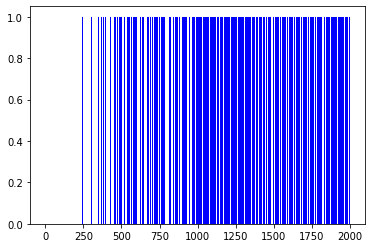

In [18]:
import matplotlib.pyplot as plt

#sum(resultList[1]) : resultList[1] (Reward의 합 - 성공여부가 저장되 있음) 의 합 
#(성공여부의 전체합 즉 2000번 수행는데 몆번 성공했는지 합) /2000
#성공률 계산
print("성공률:",str(sum(resultList[1])/len(resultList[1])))
#plt.bar() : 막대 그래프를 그림
#len(resultList[1]): resultList[1] 의 줄의수 (2000)

## range(len(resultList[1])), resultList[1], color="blue")

#range(len(resultList[1])): 0~2000 까지 막대그래프의 X좌표로 설정
#resultList[1] : 막대그래프의 Y죄표로 설정
# color="blue": 그래프의 막대 색깔 파랑

plt.bar(range(len(resultList[1])), resultList[1], color="blue")